# CONVOLUTIONAL NURAL NETWORK FOR MALARIA DIAGNOSIS
In this project, I shall train a convolutional neural network on images of 24958 malaria infected and uninfected cells with another 2600 cells to be used for testing. The goal is to have the deep learning model accept new cell of an undiagnosed patient and correctly predict if the patient is malaria infected or not. This project is an end to end Machine Learning (Deep Learning) which encompasses model training and deployment using with Flask.  

In [45]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
# Technically not necessary in newest versions of jupyter
%matplotlib inline

## FILE STRUCTURE
The images are organized into folders. The parent folder called cell_images contain 2 folders called test and train. The test folder has 2 other folders called parasitized and uninfected. The parasitized folder contain images of cells infected with malaria parasite while the uninfected folder also contain images of parasitized and uninfected cell. The same structure apply to the train folder. The structure is illustrated below

In [33]:
os.listdir('..\data')

['cell_images']

In [35]:
os.listdir('..\data\cell_images')

['test', 'train']

In [37]:
os.listdir('..\data\cell_images/train')

['parasitized', 'uninfected']

In [38]:
os.listdir('..\data\cell_images/test')

['parasitized', 'uninfected']

## EXPLORATORY DATA ANALYSIS

### Visualization of Infected Cell

In [50]:
infected_cell = os.listdir('..\data\cell_images/test/parasitized')[0]
infected_cell

'C100P61ThinF_IMG_20150918_144348_cell_144.png'

In [55]:
infected_cell = '..\data\cell_images/test/parasitized/C100P61ThinF_IMG_20150918_144348_cell_144.png'

In [56]:
infected_cell = imread(infected_cell)
infected_cell

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

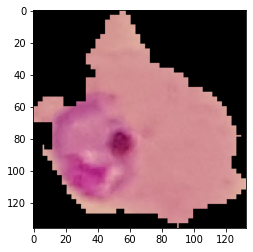

In [57]:
plt.imshow(infected_cell)

In [58]:
infected_cell.shape

(136, 133, 3)

### Visualization of uninfected cell

In [59]:
uninfected_cell = os.listdir('..\data\cell_images/train/uninfected')[0]
uninfected_cell

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [62]:
uninfected_cell = '..\data\cell_images/train/uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [63]:
uninfected_cell = imread(uninfected_cell)
uninfected_cell

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

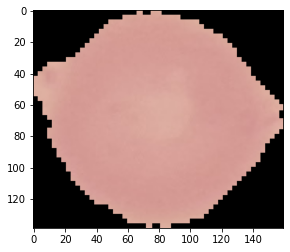

In [64]:
plt.imshow(uninfected_cell)

In [65]:
uninfected_cell.shape

(139, 160, 3)

### Number of images in each directory

In [67]:
len(os.listdir('..\data\cell_images/train/parasitized'))

12480

In [68]:
len(os.listdir('..\data\cell_images/test/parasitized'))

1300

In [69]:
len(os.listdir('../data\cell_images/train/uninfected'))

12480

In [70]:
len(os.listdir('..\data\cell_images/test/uninfected'))

1300

### Observe that the images are of different dimensions. We find the average dimension of the images and use that as input dimension to our model.

In [71]:
infected_cell.shape

(136, 133, 3)

In [72]:
uninfected_cell.shape

(139, 160, 3)

In [74]:
os.listdir('..\data\cell_images/test/uninfected')

['C100P61ThinF_IMG_20150918_144104_cell_34.png',
 'C100P61ThinF_IMG_20150918_144348_cell_108.png',
 'C100P61ThinF_IMG_20150918_145042_cell_33.png',
 'C100P61ThinF_IMG_20150918_145422_cell_138.png',
 'C100P61ThinF_IMG_20150918_145938_cell_145.png',
 'C100P61ThinF_IMG_20150918_150041_cell_4.png',
 'C100P61ThinF_IMG_20150918_150041_cell_67.png',
 'C101P62ThinF_IMG_20150918_151149_cell_28.png',
 'C101P62ThinF_IMG_20150918_151149_cell_43.png',
 'C101P62ThinF_IMG_20150918_151335_cell_26.png',
 'C101P62ThinF_IMG_20150918_151942_cell_39.png',
 'C101P62ThinF_IMG_20150923_170344_cell_66.png',
 'C102P63ThinF_IMG_20150918_161826_cell_133.png',
 'C102P63ThinF_IMG_20150918_161826_cell_144.png',
 'C102P63ThinF_IMG_20150918_162155_cell_5.png',
 'C102P63ThinF_IMG_20150918_162155_cell_66.png',
 'C102P63ThinF_IMG_20150918_162511_cell_56.png',
 'C103P64ThinF_IMG_20150918_164331_cell_160.png',
 'C103P64ThinF_IMG_20150918_164331_cell_72.png',
 'C103P64ThinF_IMG_20150918_164553_cell_163.png',
 'C103P64ThinF_

In [75]:
train_path = '..\data\cell_images/train'
test_path = '..\data\cell_images/test'

In [76]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [77]:
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\uninfected'):
    
    img = imread(test_path+'\\uninfected'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

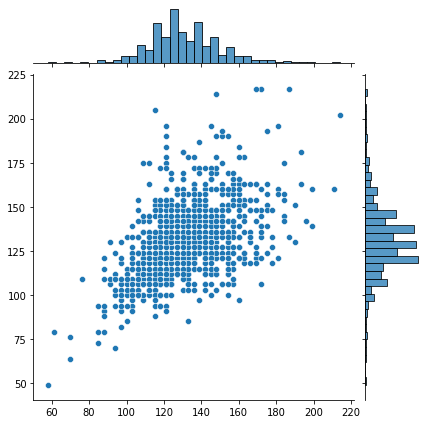

In [84]:
sns.jointplot(data = img.shape, x=dim1, y=dim2)

In [81]:
np.mean(dim1)

130.92538461538462

In [82]:
np.mean(dim2)

130.75

In [85]:
image_shape = (130,130,3)

## DATA PREPARATION
I shall use the ImageDataGenerator to automatically process the data, generate a flow of batches from a directory, and also manipulate the images and create data that can be passed into our convolutional neural network.

In [86]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [87]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               #rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

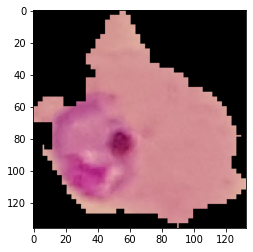

In [88]:
plt.imshow(infected_cell)

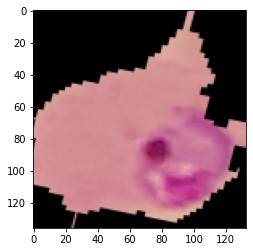

In [89]:
plt.imshow(image_gen.random_transform(infected_cell))

### We use flow_from_directory to generate manipulated images from directory

In [90]:
train_path = '..\data\cell_images/train'
test_path = '..\data\cell_images/test'

In [91]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [92]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


## CREATING AND TRAINING THE CONVOLUTIONAL NEURAL NETWORK

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [63]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

# Dropouts help reduce overfitting by randomly turning neurons off during training.
# Here we say randomly turn off 50% of neurons.
model.add(Dropout(0.5))

# Last layer, remember its binary so we use sigmoid
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0

### Early Stopping to prevent overfitting

In [65]:
from tensorflow.keras.callbacks import EarlyStopping

In [66]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## MODEL TRAINING

In [93]:
batch_size = 16

In [94]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [95]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2600 images belonging to 2 classes.


In [70]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [71]:
import warnings
warnings.filterwarnings('ignore')

In [72]:
results = model.fit_generator(train_image_gen,epochs=20,
                              validation_data=test_image_gen,
                             callbacks=[early_stop])

Epoch 1/20
1560/1560 [==============================] - 577s 369ms/step - loss: 0.9363 - accuracy: 0.5445 - val_loss: 0.7098 - val_accuracy: 0.5250
Epoch 2/20
1560/1560 [==============================] - 487s 312ms/step - loss: 0.6831 - accuracy: 0.5664 - val_loss: 0.6698 - val_accuracy: 0.5946
Epoch 3/20
1560/1560 [==============================] - 486s 311ms/step - loss: 0.6720 - accuracy: 0.5923 - val_loss: 0.6655 - val_accuracy: 0.5915
Epoch 4/20
1560/1560 [==============================] - 482s 309ms/step - loss: 0.5835 - accuracy: 0.6803 - val_loss: 0.2185 - val_accuracy: 0.9250
Epoch 5/20
1560/1560 [==============================] - 482s 309ms/step - loss: 0.1997 - accuracy: 0.9344 - val_loss: 0.1825 - val_accuracy: 0.9346
Epoch 6/20
1560/1560 [==============================] - 481s 308ms/step - loss: 0.1871 - accuracy: 0.9392 - val_loss: 0.1851 - val_accuracy: 0.9362
Epoch 7/20
1560/1560 [==============================] - 483s 309ms/step - loss: 0.1856 - accuracy: 0.9422 - val_

## MODEL EVALUATION

In [73]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,0.936342,0.544475,0.709800,0.525000
1,0.683131,0.566432,0.669759,0.594615
2,0.672035,0.592275,0.665512,0.591538
3,0.583543,0.680303,0.218547,0.925000
4,0.199732,0.934410,0.182465,0.934615
5,0.187083,0.939178,0.185062,0.936154
6,0.185608,0.942183,0.179402,0.942308
7,0.181257,0.943305,0.176397,0.941154
8,0.185304,0.942704,0.176778,0.939615
9,0.175692,0.945148,0.172311,0.942692


<AxesSubplot:>

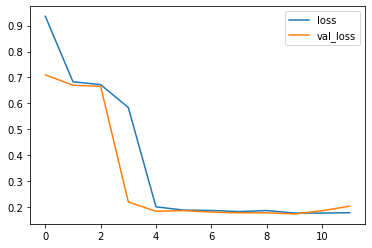

In [74]:
losses[['loss','val_loss']].plot()

In [75]:
model.metrics_names

['loss', 'accuracy']

In [76]:
model.evaluate_generator(test_image_gen)

[0.19789372384548187, 0.9365384578704834]

In [77]:
model.evaluate_generator(test_image_gen)

[0.19778400659561157, 0.936923086643219]

In [78]:
model.evaluate_generator(test_image_gen)

[0.19492243230342865, 0.936923086643219]

In [79]:
pred_probabilities = model.predict_generator(test_image_gen)

In [80]:
pred_probabilities

array([[3.3316016e-04],
       [1.2556314e-03],
       [8.9693069e-04],
       ...,
       [9.1658616e-01],
       [9.3545699e-01],
       [9.0206909e-01]], dtype=float32)

In [81]:
len(pred_probabilities)

2600

In [82]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [83]:
predictions = pred_probabilities > 0.5

In [84]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [85]:
from sklearn.metrics import classification_report,confusion_matrix

In [86]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1300
           1       0.90      0.97      0.94      1300

    accuracy                           0.93      2600
   macro avg       0.94      0.93      0.93      2600
weighted avg       0.94      0.93      0.93      2600



In [87]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1166,  134],
       [  36, 1264]], dtype=int64)

## PREDICTING A SINGLE IMAGE

In [167]:
from tensorflow.keras.preprocessing import image

In [202]:
# prediction of uninfected cell
my_image = '..\data\cell_images/test/uninfected/C55P16thinF_IMG_20150728_123237_cell_85.png'

In [203]:
my_image_1 = '..\data\cell_images/test/parasitized/C100P61ThinF_IMG_20150918_144348_cell_144.png'

In [204]:
my_image = image.load_img(my_image,target_size=image_shape)

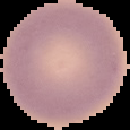

In [205]:
my_image

In [206]:
my_image_1 = image.load_img(my_image_1,target_size=image_shape)

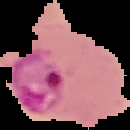

In [207]:
my_image_1

In [208]:
type(my_image)

PIL.Image.Image

In [209]:
my_image = image.img_to_array(my_image)

In [211]:
type(my_image)

numpy.ndarray

In [212]:
my_image.shape

(130, 130, 3)

In [213]:
my_image = np.expand_dims(my_image, axis=0)

In [214]:
my_image.shape

(1, 130, 130, 3)

In [215]:
prediction = model.predict(my_image)
prediction

1/1 [==============================] - 0s 52ms/step


array([[0.9930612]], dtype=float32)

In [216]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [217]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [218]:
model.save('agada_malaria_detector.h5')

In [219]:
from tensorflow.keras.models import load_model

In [220]:
model = load_model('..\model\malaria_detector_model.h5')

In [221]:
pred = model.predict(my_image)
pred

1/1 [==============================] - 0s 186ms/step


array([[0.9930612]], dtype=float32)

In [222]:
#class prediction using the model
pred = (model.predict(my_image) > 0.5)*1
pred

1/1 [==============================] - 0s 41ms/step


array([[1]])

In [188]:
np.argmax(pred[0], axis=-1)

0

In [135]:
im_class

0

In [196]:
my_image_1 = image.img_to_array(my_image_1)

In [197]:
my_image_1 = np.expand_dims(my_image_1, axis=0)

In [198]:
pred1=model.predict(my_image_1)

1/1 [==============================] - 0s 63ms/step


In [199]:
prediction = model.predict(my_image_1)
prediction

1/1 [==============================] - 0s 48ms/step


array([[0.00014566]], dtype=float32)

In [200]:
#class prediction using the model
pred = (model.predict(my_image_1) > 0.5)*1
pred

1/1 [==============================] - 0s 44ms/step


array([[0]])

In [164]:
np.argmax(pred1, axis=1)[0]

0

In [165]:
np.argmax(pred, axis=1)[0]

0

In [225]:
result = (model.predict(my_image), (model.predict(my_image) > 0.5)*1)

1/1 [==============================] - 0s 33ms/step


In [226]:
result

(array([[0.9930612]], dtype=float32), array([[1]]))

In [229]:
for i, res in enumerate(result):
    print(i)

0
1
